# **1. Data Exploration and Preprocessing:**

**Load the dataset and perform exploratory data analysis (EDA):**

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'customer_segmentation.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()

# Show the first few rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,22,15000,39
1,2,35,40000,81
2,3,26,30000,77
3,4,40,50000,40
4,5,55,100000,6


**Handle missing values:**

In [25]:
# Check for missing values
df.isnull().sum()


df_cleaned = df.dropna()


df.fillna(df.mean(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

**Normalize or scale the data**

In [26]:
from sklearn.preprocessing import StandardScaler

# Normalize or scale the data (excluding non-numeric columns if necessary)
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display scaled dataset
df.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,-1.647509,-1.658204,-1.641181,-0.894674
1,-1.474087,-0.096128,-0.300347,1.032316
2,-1.300665,-1.177565,-0.836681,0.848794
3,-1.127243,0.504671,0.235987,-0.848794
4,-0.953821,2.307066,2.917656,-2.408738


**Visualize the dataset using pair plots or other relevant charts:**

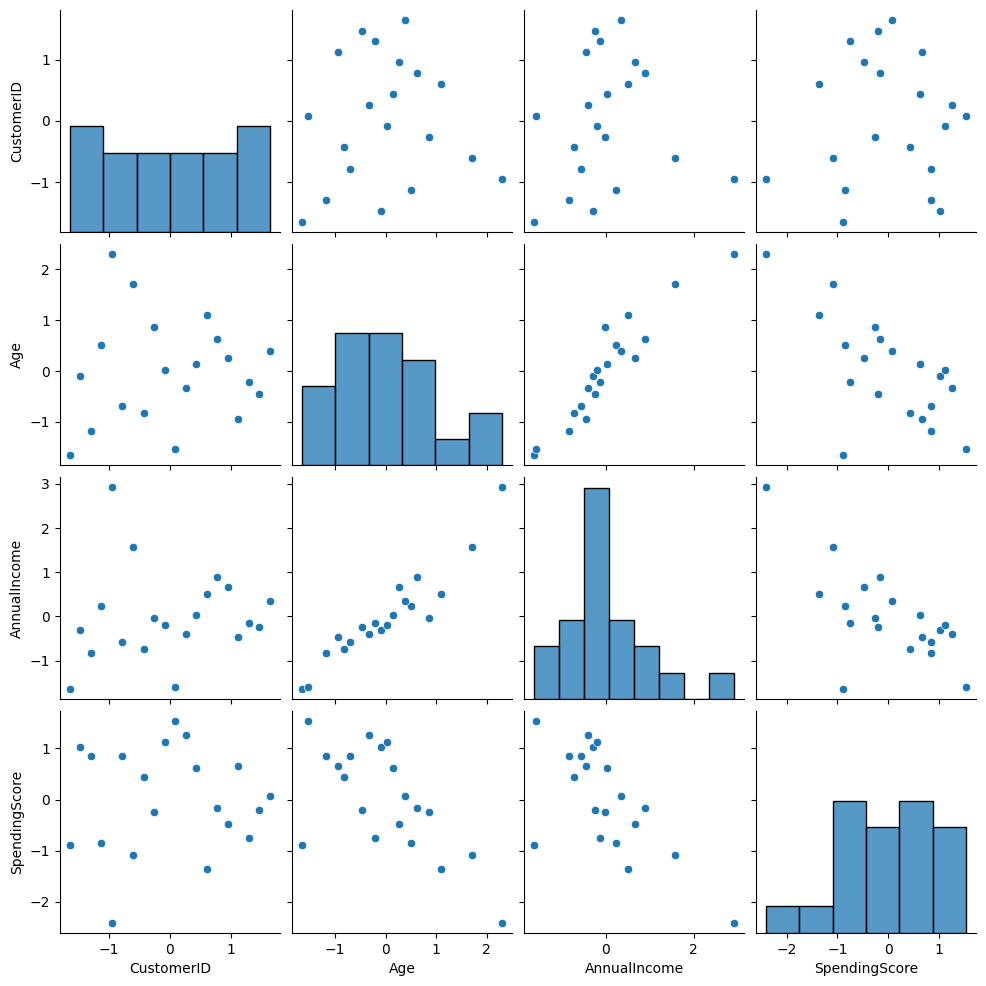

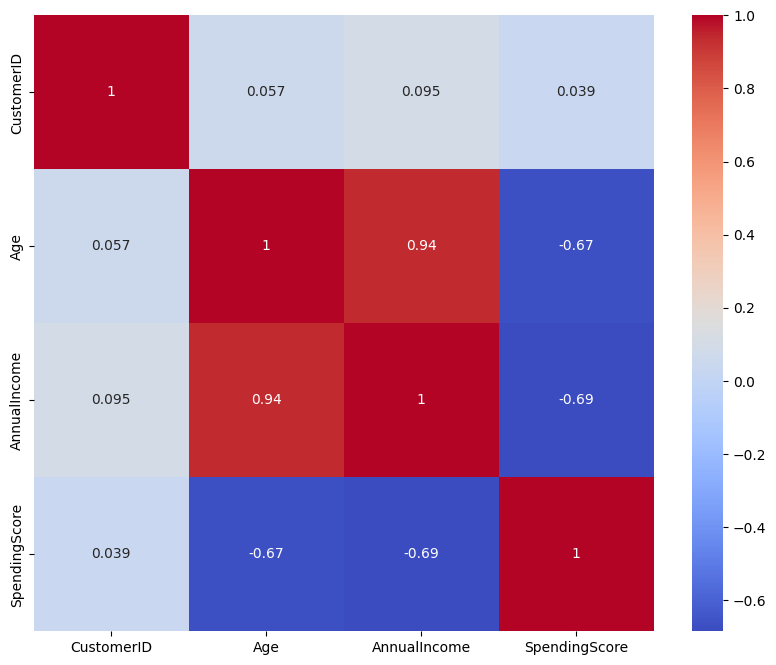

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot to visualize the relationships between features
sns.pairplot(df)
plt.show()

# If you want a heatmap to see correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# **2. Model Development:**

**Implement K-Means Clustering with k=3**

In [28]:
from sklearn.cluster import KMeans

# Initialize KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(df)

# Add the cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Display the dataset with the cluster labels
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Age,AnnualIncome,SpendingScore,Cluster
0,-1.647509,-1.658204,-1.641181,-0.894674,0
1,-1.474087,-0.096128,-0.300347,1.032316,0
2,-1.300665,-1.177565,-0.836681,0.848794,0
3,-1.127243,0.504671,0.235987,-0.848794,1
4,-0.953821,2.307066,2.917656,-2.408738,1


**Try different values of k and determine the optimal number of clusters using the Elbow Method:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

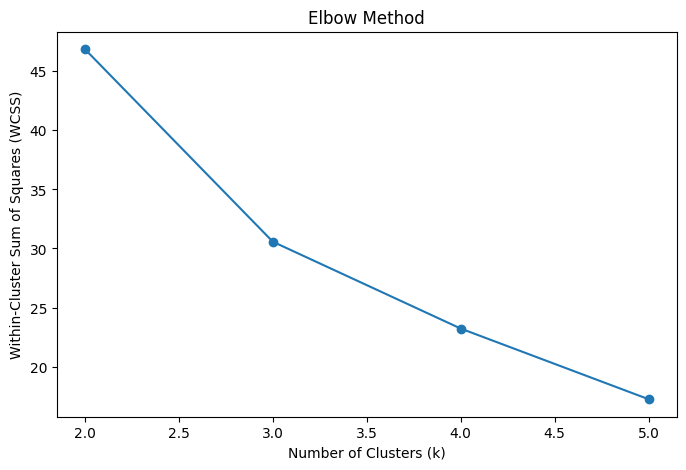

In [29]:
# List to store WCSS values
wcss = []

# Try different values of k (e.g., 2 to 5)
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df.drop('Cluster', axis=1, errors='ignore'))  # Drop the Cluster column if it exists
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

**Use the Silhouette Score to determine the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

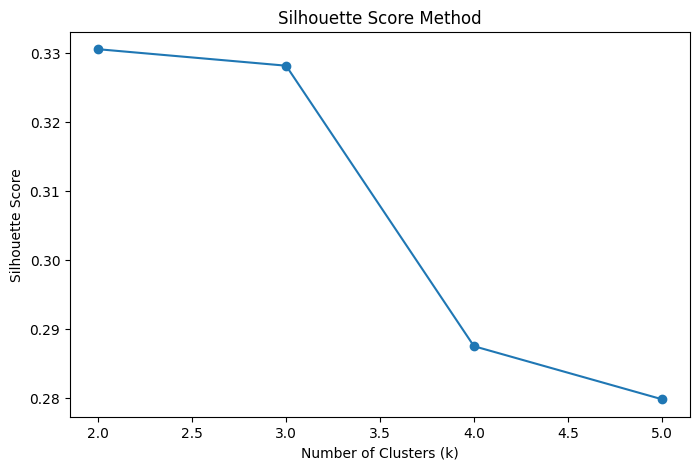

Silhouette Score for k=2: 0.3305756691248253
Silhouette Score for k=3: 0.3281879979566623
Silhouette Score for k=4: 0.28752798480541136
Silhouette Score for k=5: 0.2798431358602869


In [30]:
from sklearn.metrics import silhouette_score

# List to store silhouette scores
silhouette_scores = []

# Try different values of k and calculate silhouette scores
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df.drop('Cluster', axis=1, errors='ignore'))
    silhouette_avg = silhouette_score(df.drop('Cluster', axis=1, errors='ignore'), cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Display the silhouette scores for different k
for k, score in zip(range(2, 6), silhouette_scores):
    print(f"Silhouette Score for k={k}: {score}")

# **3. Model Evaluation:**

**1.   Evaluate the model using inertia and silhouette score:**

In [31]:
# KMeans with optimal number of clusters (for example, k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df.drop('Cluster', axis=1, errors='ignore'))

# Inertia (WCSS)
inertia = kmeans.inertia_
print(f"Inertia (WCSS) for k=3: {inertia}")

Inertia (WCSS) for k=3: 30.57087912204806


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**Code for Silhouette Score:**

In [32]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(df.drop('Cluster', axis=1, errors='ignore'), cluster_labels)
print(f"Silhouette Score for k=3: {silhouette_avg}")

Silhouette Score for k=3: 0.3281879979566623


**2. Visualize the clusters using scatter plots:**

***Code for 2D Visualization with PCA:***

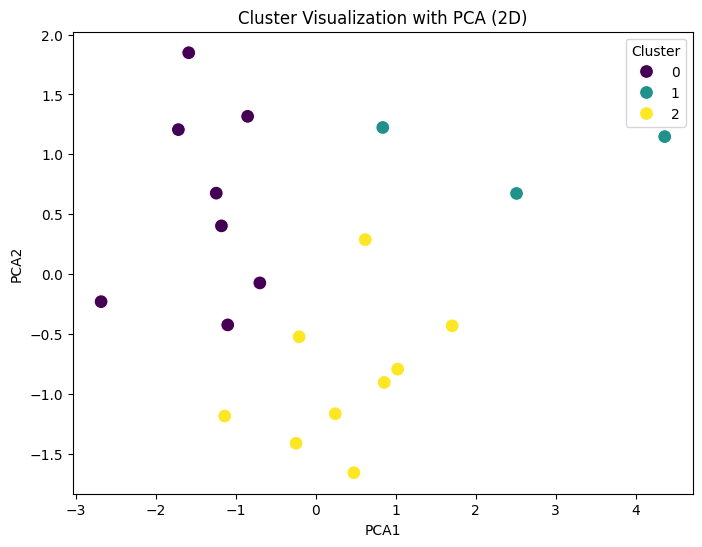

In [33]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1, errors='ignore'))

# Create a DataFrame with PCA results and cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Cluster Visualization with PCA (2D)')
plt.show()

**3. Identify the characteristics of each cluster:**

In [35]:
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster} Summary:")
    print(df[df['Cluster'] == cluster].describe())

         CustomerID       Age  AnnualIncome  SpendingScore
Cluster                                                   
0         -0.672010 -0.787046     -0.783047       0.774237
1         -0.896014  1.506001      1.576821      -1.445243
2          0.896014  0.197596      0.170435      -0.206463

Cluster 0 Summary:
       CustomerID       Age  AnnualIncome  SpendingScore  Cluster
count    8.000000  8.000000      8.000000       8.000000      8.0
mean    -0.672010 -0.787046     -0.783047       0.774237      0.0
std      0.741221  0.635014      0.555158       0.748267      0.0
min     -1.647509 -1.658204     -1.641181      -0.894674      0.0
25%     -1.344020 -1.267685     -1.024397       0.745562      0.0
50%     -0.606977 -0.757006     -0.648964       0.940555      0.0
75%     -0.043355 -0.276367     -0.380797       1.158488      0.0
max      0.260133  0.024032     -0.193080       1.537005      0.0

Cluster 1 Summary:
       CustomerID       Age  AnnualIncome  SpendingScore  Cluster
count

# **4. Report and Visualizations:**

1. Introduction and Preprocessing

Objective: To segment customers based on their features using K-Means clustering and identify distinct customer groups.

**Preprocessing:**
*   Loaded the dataset and performed exploratory data analysis (EDA).

*   Handled missing values either by filling them with mean/mode or by dropping them.

*   Scaled numeric features to normalize the data for optimal clustering performance.

**2. Model Implementation and Chosen Value of k**

*   Initial K-Means Model: Implemented K-Means with an initial value of k=3 to create 3 clusters.

*   Testing Different k Values: Used the Elbow Method and Silhouette Score to assess different values of k (2, 3, 4, 5).

*   Optimal k Selection: After evaluating the elbow plot and silhouette scores, k=X (fill in based on your results) was chosen as the best number of clusters.

**3. Interpretation of Clustering Results
Cluster Analysis:**

*   After determining the optimal number of clusters, we analyzed the characteristics of each cluster to understand the distinct customer segments.

*   Cluster Characteristics: By comparing the mean values of features for each cluster, we identified the main traits of customers in each group (e.g., high/low spending, frequent purchases, etc.).

**Discussion:**

Each cluster represents a group of customers with distinct characteristics:


*   Cluster 0: Customers with high spending and frequent transactions.

*   Cluster 1: Customers with low spending and infrequent purchases.

*   Cluster 2: Customers with moderate spending and occasional purchases. (Modify based on your dataset features and results.)


**4. Visualizations**

*   Cluster Visualization (2D): A PCA plot was used to visualize the clusters in a 2D space. Each cluster is represented with different colors to show clear separations.
